# macaque dataset

## load dataset and moudle

In [ ]:
import scDML
print(scDML.__version__)
import scanpy as sc 
import torch
from scDML import scDMLModel
from scDML.utils import print_dataset_information
import os
os.system("clear")

###############
dataset="macaque"
ncluster=12
###############

data_dir="../tutorial_data"+"/"+dataset+"_raw.h5ad"
adata=sc.read(data_dir)
print(adata)

print_dataset_information(adata,batch_key="BATCH",celltype_key="celltype")

## scDML fullrun

`scDML.full_run()` integrate all step of scDML,you can ignore detail of each step to get final embedding

0.0.1
Saving file folder exists
==========Create scDMLModel Object Done....     ===================
dataset is not preprocessed,run 'preprocess()' function to preprocess
==========Running preprocess() function         ===================
Normalize counts per cell(sum=10000.0)
Log1p data
Select HVG(n_top_genes=1000)
Scale batch(scale_value=10.0)
Calculate PCA(n_comps=100)


         Falling back to preprocessing with `sc.pp.pca` and default params.


Apply louvain clustring(resolution=3.0) initization
Number of Cluster =35
clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
Preprocess Dataset Done...
==========Calculate similarity of cluster with KNN and MNN=========
appoximate calculate KNN Pair intra batch...
Calculate KNN pair intra batch...........
K=5
metric=cosine
Processing datasets: (0, 0) = ('M1', 'M1')
There are (71696) KNN pairs when processing (0, 0)=('M1', 'M1')
Processing datasets: (1, 1) = ('M2', 'M2')
There are (67494) KNN pairs when processing (1, 1)=('M2', 'M2')
Processing datasets: (2, 2) = ('M3', 'M3')
There are (29904) KNN pairs when processing (2, 2)=('M3', 'M3')
Processing datasets: (3, 3) = ('M4', 'M4')
There are (30502) KNN pairs when processing (3, 3)=('M4', 'M4')
scDML finds (199596) KNN pairs in dataset finally
appoximate calculate MNN Pair inter batch...
Calculate MNN pair inter batch...........
K=10
metric=cosine
Pr

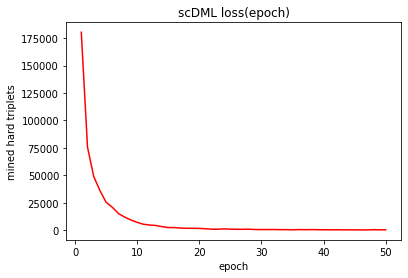

============do prediction for dataset ==============


... storing 'sample' as categorical                  
... storing 'macaque_id' as categorical
... storing 'region' as categorical
... storing 'BATCH' as categorical


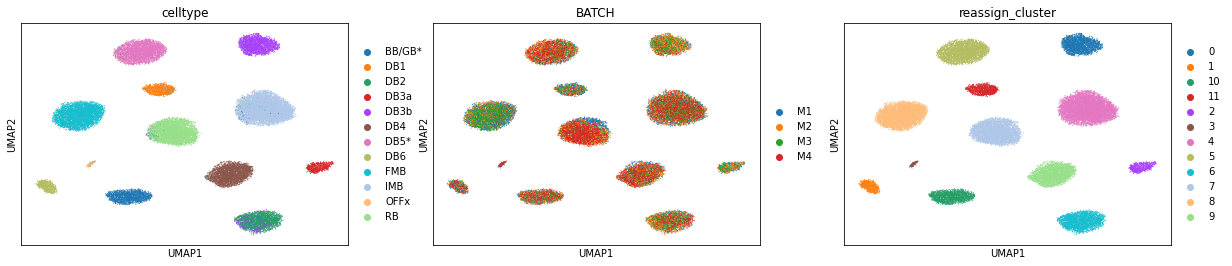

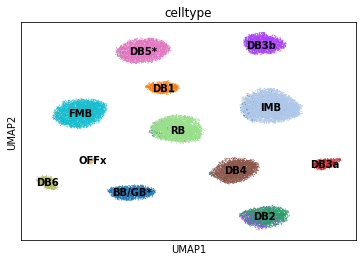

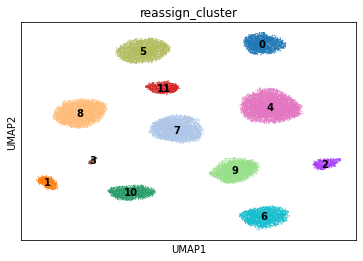

In [1]:
save_dir="./result/"+dataset+"/"
if os.path.isfile(os.path.join(save_dir,"scDML_model.pkl")):
    os.remove(os.path.join(save_dir,"scDML_model.pkl"))

scdml=scDMLModel(save_dir="./result/"+dataset+"/",verbose=False)
embedding=scdml.full_run(adata,resolution=3.0,batch_key="BATCH",ncluster_list=[ncluster],
               expect_num_cluster=ncluster,merge_rule="rule2",cluster_method="louvain")


## visulization

In [ ]:
###########################################
sc.pp.neighbors(embedding,random_state=0)
sc.tl.umap(embedding)
###########################################

sc.pl.umap(embedding,color=["celltype","BATCH"])
sc.pl.umap(embedding,color=["celltype","reassign_cluster"],legend_loc="on data")
sc.pl.umap(embedding,color=["celltype"],groups=["OFFx"],na_in_legend=False)

## evaluation

In [6]:
import pandas as pd
df=pd.crosstab(embedding.obs["celltype"],embedding.obs["reassign_cluster"])
col=df.apply('idxmax', axis=1).values
df=df[col]
df

reassign_cluster,10,11,6,2,0,9,5,1,8,4,3,7
celltype,,,,,,,,,,,,
BB/GB*,1723,1,0,1,0,2,2,1,4,72,0,9
DB1,1,970,0,1,1,0,0,1,10,1,8,3
DB2,3,0,2127,0,38,4,6,1,11,2,0,52
DB3a,1,0,0,616,1,0,0,0,0,0,1,4
DB3b,0,1,473,1,2131,4,6,0,4,5,1,14
DB4,0,0,2,0,2,2961,14,0,2,0,1,3
DB5*,1,0,2,0,0,6,3434,0,1,12,0,11
DB6,1,0,1,0,0,2,2,638,1,6,0,7
FMB,1,32,8,3,7,5,5,0,4389,11,25,14


In [8]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ari=adjusted_rand_score(embedding.obs["reassign_cluster"],embedding.obs["celltype"])
nmi=normalized_mutual_info_score(embedding.obs["reassign_cluster"],embedding.obs["celltype"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))

ARI=0.9383202811532773
NMI=0.9243805815126516


# citation

In [ ]:
Peng, Y.-R. et al. Molecular Classification and Comparative Taxonomics of Foveal and Peripheral Cells in Primate Retina. Cell 176, 1222-1237.e22 (2019).

In [ ]:
# Attention!!!!
# you can also use leiden clustering algorithm to for cluster inizitization, 
# It may give more accurate result than louvain